https://huggingface.co/nateraw/vit-age-classifier

In [1]:
import requests
from PIL import Image
from io import BytesIO

from transformers import ViTFeatureExtractor, ViTForImageClassification

In [2]:
# Get example image from official fairface repo + read it in as an image
r = requests.get('https://github.com/dchen236/FairFace/blob/master/detected_faces/race_Asian_face0.jpg?raw=true')
im = Image.open(BytesIO(r.content))

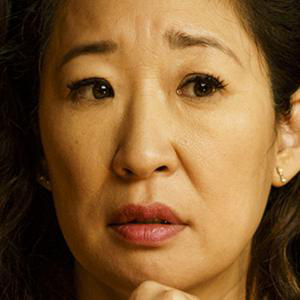

In [3]:
im

In [4]:
# Init model, transforms
model = ViTForImageClassification.from_pretrained('nateraw/vit-age-classifier')

In [5]:
# Transform our image and pass it through the model
transforms = ViTFeatureExtractor.from_pretrained('nateraw/vit-age-classifier')
inputs = transforms(im, return_tensors='pt')

/home/maparla/anaconda3/envs/mlenv/lib/python3.10/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [6]:
output = model(**inputs)

In [8]:
# Predicted Class probabilities
proba = output.logits.softmax(1)

In [10]:
proba

tensor([[1.5682e-05, 1.0800e-05, 2.6098e-04, 3.4043e-02, 5.1783e-01, 4.0131e-01,
         4.4747e-02, 1.7524e-03, 3.1323e-05]], grad_fn=<SoftmaxBackward0>)

In [24]:
# Predicted Classes
preds = proba.argmax(1).item()

https://huggingface.co/nateraw/vit-age-classifier/blob/main/config.json

In [25]:
id2label =  {
    0: "0-2",
    1: "3-9",
    2: "10-19",
    3: "20-29",
    4: "30-39",
    5: "40-49",
    6: "50-59",
    7: "60-69",
    8: ">70"
}

In [26]:
id2label[preds]

'30-39'

---

In [27]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("image-classification", model="nateraw/vit-age-classifier")

In [29]:
pipe(im)

[{'score': 0.5178317427635193, 'label': '30-39'},
 {'score': 0.4013065695762634, 'label': '40-49'},
 {'score': 0.04474736750125885, 'label': '50-59'},
 {'score': 0.03404312580823898, 'label': '20-29'},
 {'score': 0.0017523844726383686, 'label': '60-69'}]